In [31]:
%matplotlib inline

import pylab as pl
import numpy as np
import pandas as pd

In [208]:
legenda = {
    0 : 'PBS',
    1 : 'PBS+Gfp',
    2 : 'PBS+Amp10',
    3 : 'PBS+Amp50',
    4 : 'PBS+Amp100',
    5 : 'LB',
    6 : 'LB+Gfp',
    7 : 'LB+Amp50'
}

In [193]:
def filterString(string):
    return string.rstrip().split('\t')


def filterTime(time):
    tsplit = time.split(':')
    coef = {3 : 3600., 2 : 60., 1 : 1.}
    nterms = len(tsplit)
    
    ftime = 0.0
    for item in tsplit:
        ftime += coef[nterms]*float(item)
        nterms -= 1
    
    return ftime


def ReadFluor_nanomed(filename, header = 3):
    f = open(filename, 'r')
    for j in range(3):
        f.readline()
    
    Readings = []
    Times = []
    
    while True:
        line = f.readline()
        if not line: break
        
        read = filterString( line )
        if len(read) > 1:
            Lines = []
            
            for nwell in range( 8 ):
                
                line = []
                
                if read[0] != "": Times.append( filterTime(read[0]) )
                
                for reading in read[2:]:
                    line.append( float(reading) )
                
                Lines.append(line)
                
                read = filterString( f.readline() )
            
            Readings.append( np.array( Lines ) )
            
    return np.array( Times ), Readings



def AbsorbLineReading(Times, Data, lines = np.arange(8)):
    
    ntimes = Times.shape[0]
    m = np.zeros( (lines.shape[0], ntimes) )
    
    for time in range(ntimes):
        for line in lines:
            m[line,time] = Data[time][line].mean()
    
    return m

def ODplot(Data, title=""):
    for j in range(8):
        pl.plot(Data[j,:], '-')
    
    pl.xlim(-1,9)
    pl.title(title)
    pl.xlabel('Sample id')
    pl.ylabel('OD')
    pl.show()

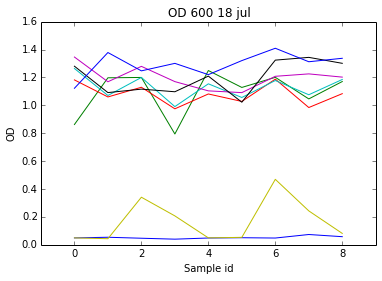

In [187]:
filename = 'placa transparente OD 600 18 jul.txt'
Times, Data = ReadFluor_nanomed(filename)
ODplot( Data[0], title='OD 600 18 jul' )

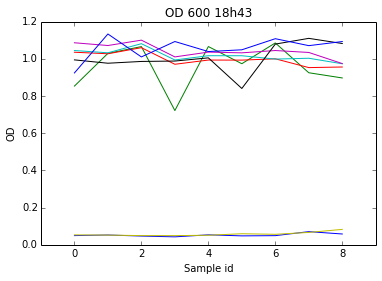

In [169]:
filename = 'placa transparente OD 600 18h43.txt'
Times, Data = ReadFluor_nanomed(filename)
ODplot( Data[0], title='OD 600 18h43' )

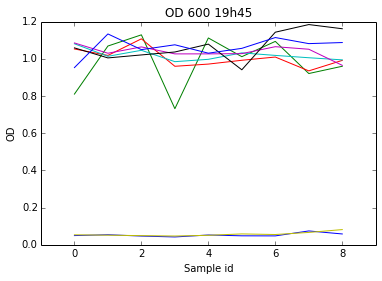

In [170]:
filename = 'placa transparente OD 600 19h45.txt'
Times, Data = ReadFluor_nanomed(filename)
ODplot( Data[0], title='OD 600 19h45' )

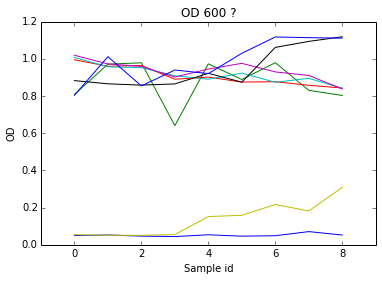

In [212]:
filename = 'placa transparente OD 600.txt'
Times, Data = ReadFluor_nanomed(filename)
ODplot( Data[0], title='OD 600 ?' )

In [195]:
filename = 'placa 4 horas fluores.txt'
Times, Data = ReadFluor_nanomed(filename)
m = AbsorbLineReading(Times, Data)

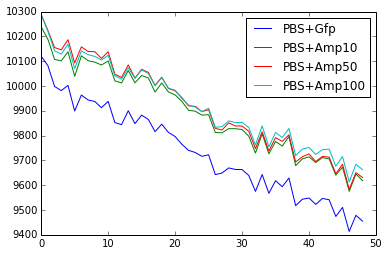

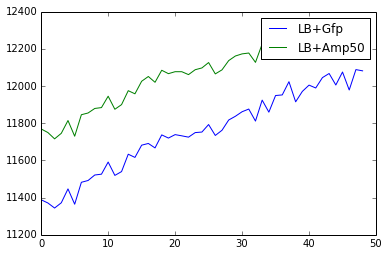

In [211]:
for j in range(1,5):
    pl.plot(m[j,:], label=legenda[j])

pl.legend()
pl.show()

pl.plot(m[6,:], label=legenda[6])
pl.plot(m[7,:], label=legenda[7])
pl.legend()
pl.show()